In [3]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action = "ignore")

In [7]:
#Data Collection and Analysis

#PIMA Diabetes Dataset

# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('C:/Users/shubh/Downloads/diabetes.csv')
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

In [9]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [13]:
# getting the statistical measures of the data
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [21]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


<Axes: xlabel='BMI', ylabel='Density'>

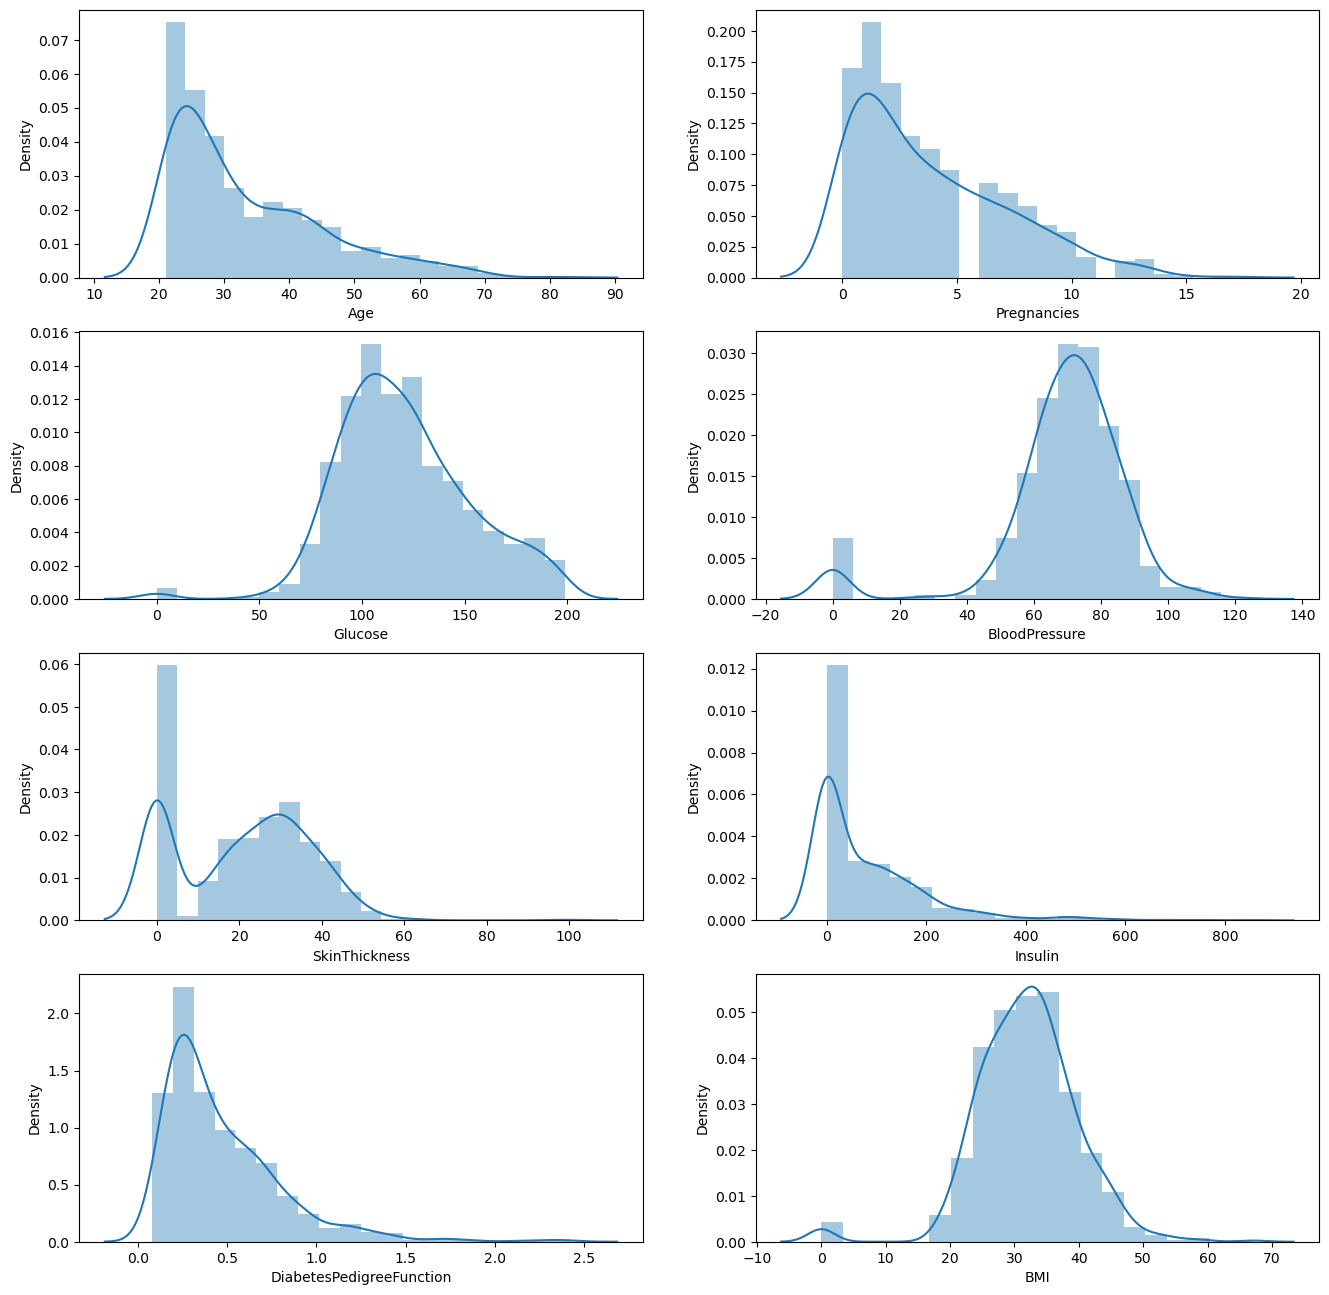

In [23]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_dataset.Age, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset.BMI, bins = 20, ax=ax[3,1])

In [25]:
#Data Standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
X = standardized_data
y = diabetes_dataset['Outcome']
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [29]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
BMI 0.0143  % missing values


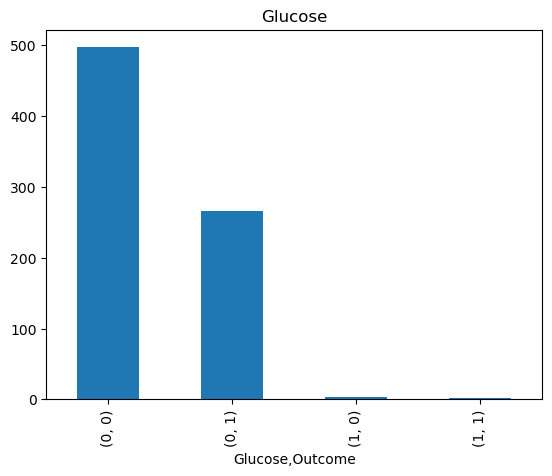

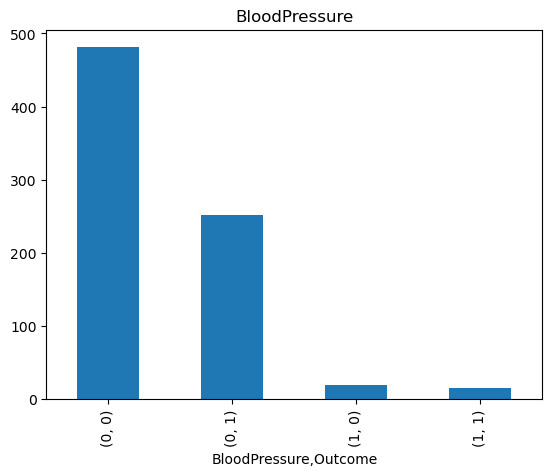

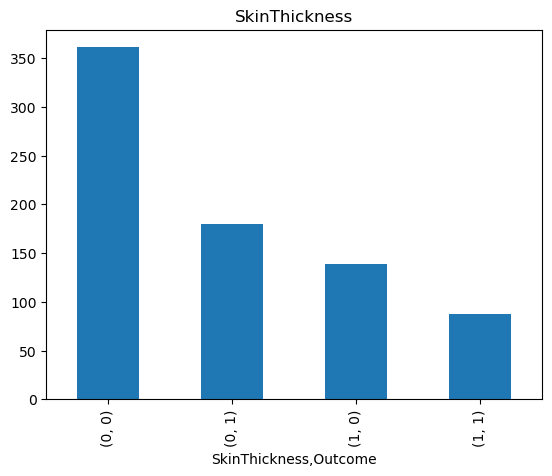

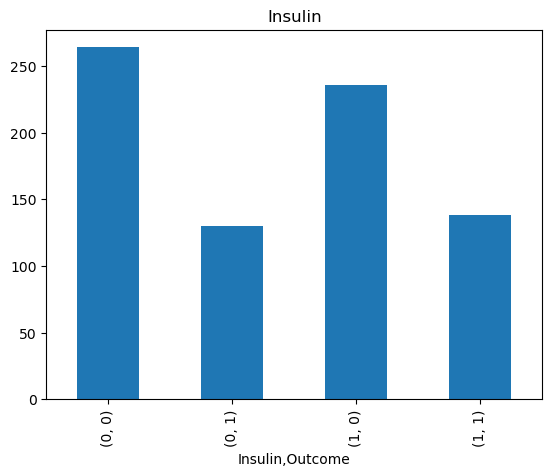

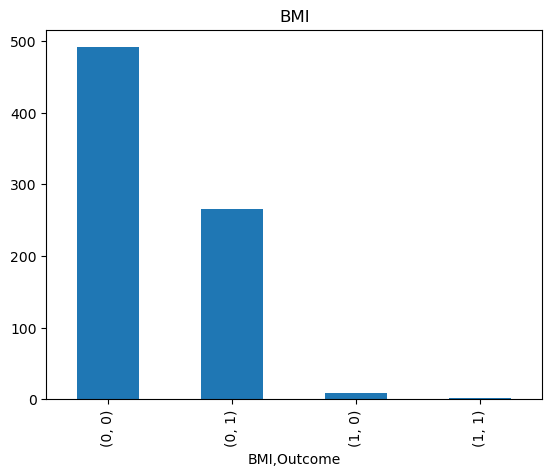

In [31]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = diabetes_dataset.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
columns_with_na=[features for features in df_copy.columns if df_copy[features].isnull().sum()>0]

for feature in columns_with_na:
    print(feature, np.round(df_copy[feature].isnull().mean(), 4),  ' % missing values')
for feature in columns_with_na:
    data = df_copy.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['Outcome'].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Columns to replace zero values
columns_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with the median of each column
imputer = SimpleImputer(missing_values=0, strategy='median')
diabetes_dataset[columns_to_replace_zero] = imputer.fit_transform(diabetes_dataset[columns_to_replace_zero])

# Standardize the features
scaler = StandardScaler()
features = diabetes_dataset.drop('Outcome', axis=1)
features_scaled = scaler.fit_transform(features)

# Combine the scaled features with the target
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Outcome'] = diabetes_dataset['Outcome'].values

# Display the first few rows of the preprocessed dataframe
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [35]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [39]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [41]:
#Training the Model
classifier = SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

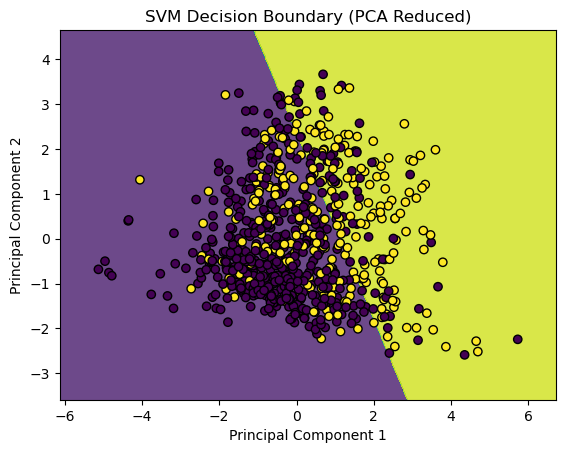

In [45]:
from sklearn.decomposition import PCA
# Use PCA to reduce the data to 2 dimensions for visualization, original dataset has 8 features you can't
#directly plot the decision boundary in 2D space due to the high dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (PCA Reduced)')
plt.show()

In [47]:
#Model Evaluation

In [53]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7727272727272727


In [55]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Display the training accuracy
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.7850


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

Testing Accuracy: 0.7597
Confusion Matrix:
[[89 11]
 [26 28]]
Precision: 0.7179
Recall: 0.5185
F1-score: 0.6022


Testing Accuracy: 0.7597
Confusion Matrix:
[[89 11]
 [26 28]]
Precision: 0.7179
Recall: 0.5185
F1-score: 0.6022


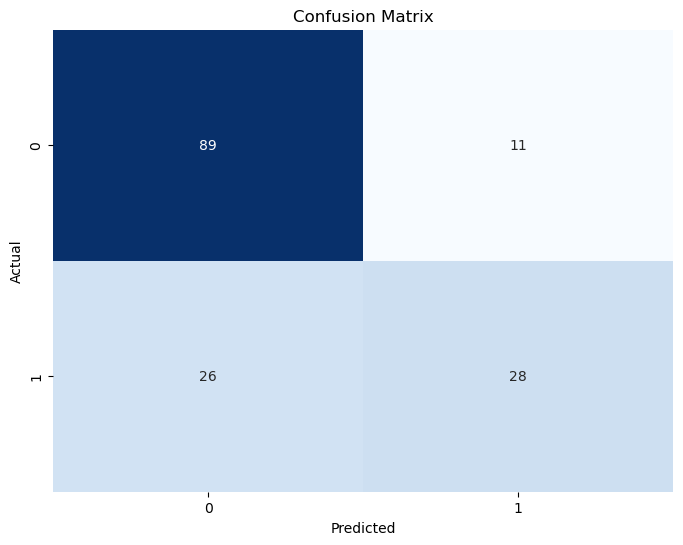

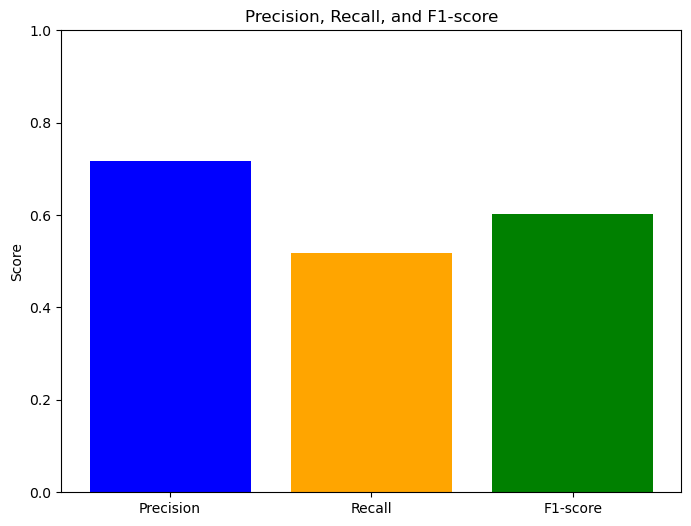

In [59]:
# Initialize the model with the best parameters
best_model = LogisticRegression(C=1, penalty='l2', solver='saga', random_state=42)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Display the evaluation metrics
print(f"Testing Accuracy: {accuracy_best:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-score: {f1_best:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot bar chart for precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision_best, recall_best, f1_best]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title("Precision, Recall, and F1-score")
plt.ylabel("Score")
plt.show()

Random Forest - Accuracy: 0.7597
Random Forest - Precision: 0.6977
Random Forest - Recall: 0.5556
Random Forest - F1-score: 0.6186


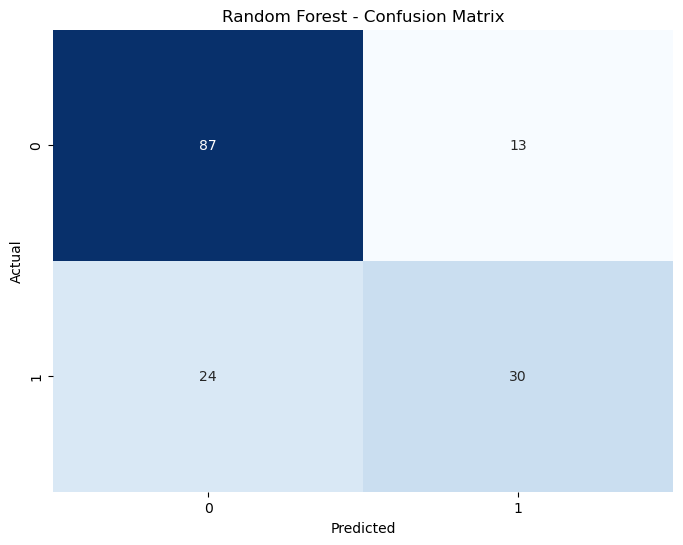

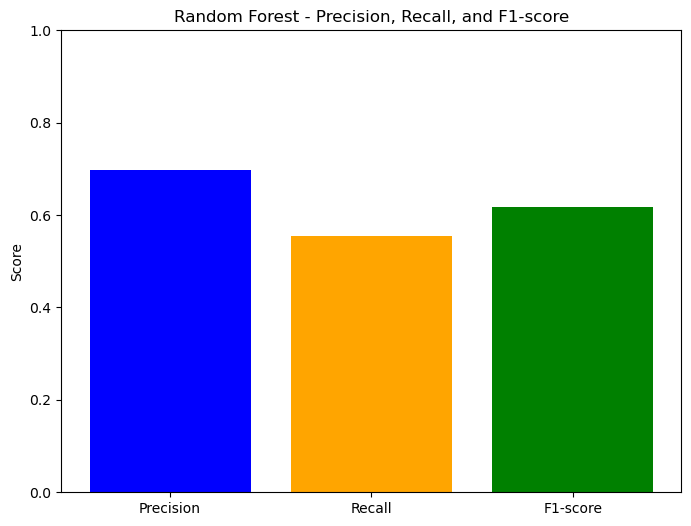

In [61]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display the results
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-score: {f1_rf:.4f}")

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot bar chart for precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title("Random Forest - Precision, Recall, and F1-score")
plt.ylabel("Score")
plt.show()

Gradient Boosting - Accuracy: 0.7013
Gradient Boosting - Precision: 0.6000
Gradient Boosting - Recall: 0.4444
Gradient Boosting - F1-score: 0.5106


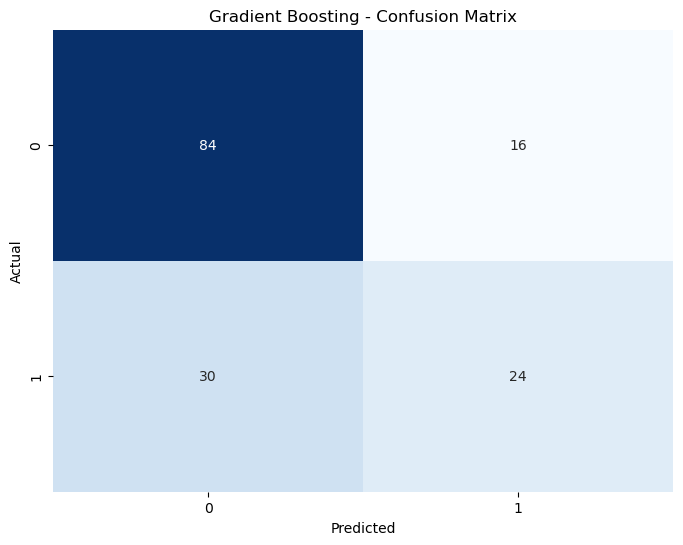

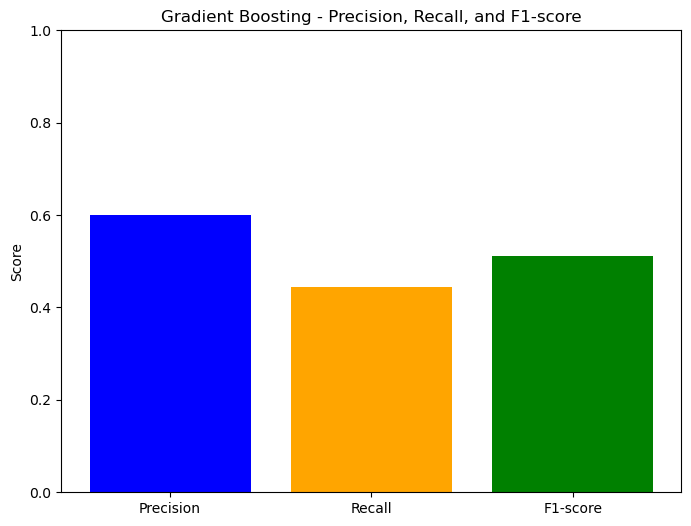

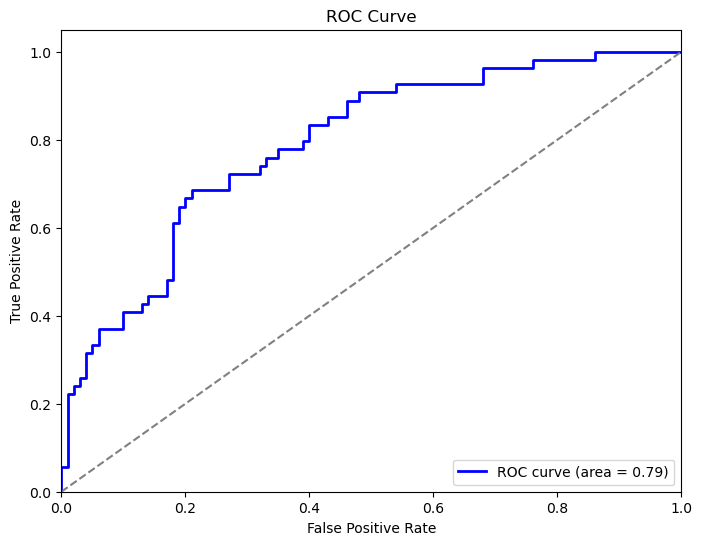

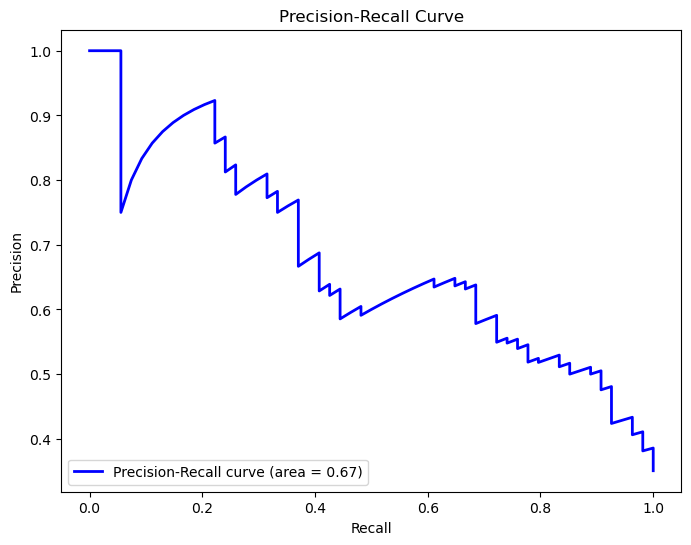

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting - Precision: {precision_gb:.4f}")
print(f"Gradient Boosting - Recall: {recall_gb:.4f}")
print(f"Gradient Boosting - F1-score: {f1_gb:.4f}")

# Plot confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot bar chart for precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision_gb, recall_gb, f1_gb]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title("Gradient Boosting - Precision, Recall, and F1-score")
plt.ylabel("Score")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_gb)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [65]:
#best is random forst so we save it now
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_diabetes_model.pkl')

print("Model saved as 'random_forest_diabetes_model.pkl'")

Model saved as 'random_forest_diabetes_model.pkl'


In [67]:
import numpy as np
# Load the model
loaded_model = joblib.load('random_forest_diabetes_model.pkl')

# Example new data (replace with actual new data)
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


# Make predictions
new_predictions = loaded_model.predict(std_data)

print(f"Predictions: {new_predictions}")
if (new_predictions[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45779063 -0.03198993 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
Predictions: [1]
The person is diabetic


<Axes: xlabel='Outcome', ylabel='count'>

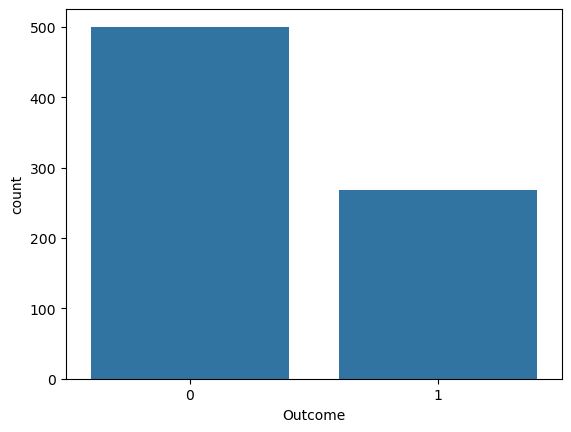

In [73]:
#Data Visualization
# checking the distribution of outcomes
df=diabetes_dataset
sns.countplot(x="Outcome",data=df)

<Axes: xlabel='Pregnancies'>

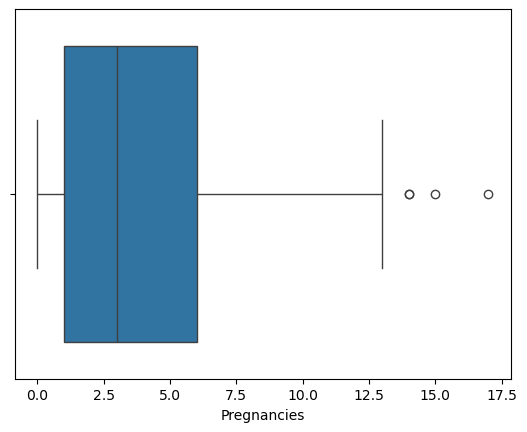

In [75]:
# checking for outliners 
import seaborn as sns
sns.boxplot(x=df['Pregnancies'])

Number of discrete Columns is 1
Pregnancies has 17 discrete values


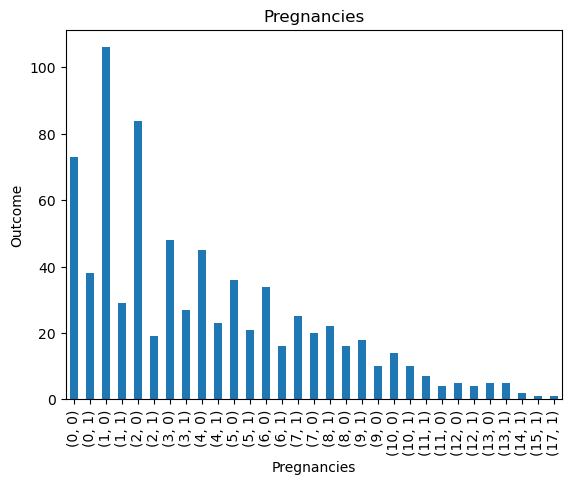

In [77]:
# Check if any numerical columns are discrete
discrete_columns = [feature for feature in df_copy.columns if len(df_copy[feature].unique()) < 20 and feature not in ['Outcome'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(df_copy[i].unique())} discrete values')

df_copy[discrete_columns].head()

#Check distribution of the discrete data
for feature in discrete_columns:
    dt=df_copy.copy()
    dt.groupby(feature)['Outcome'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(feature)
    plt.show()

Number of numerical columns is 9
Number of Continous Columns is 7


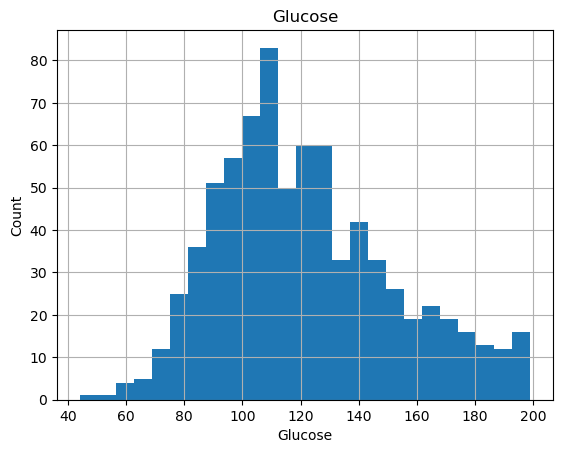

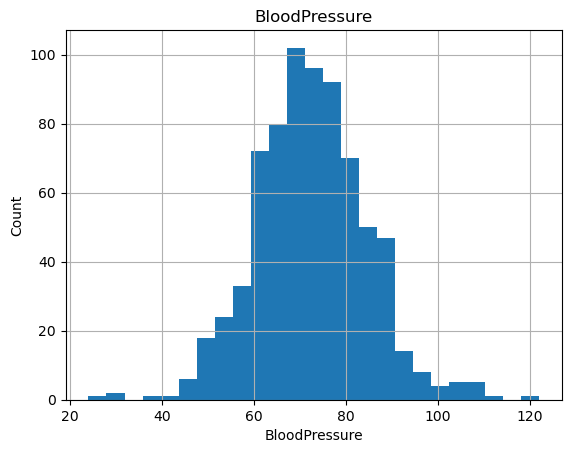

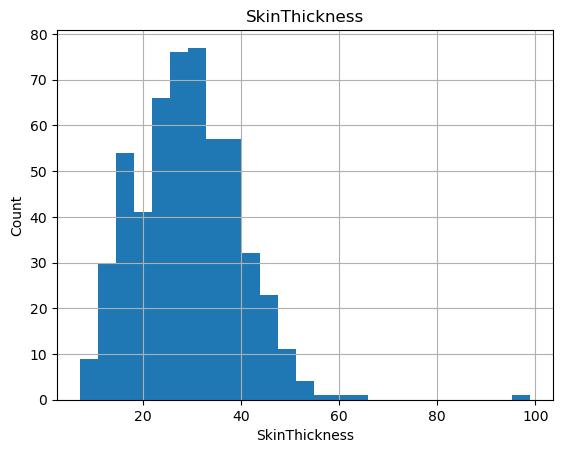

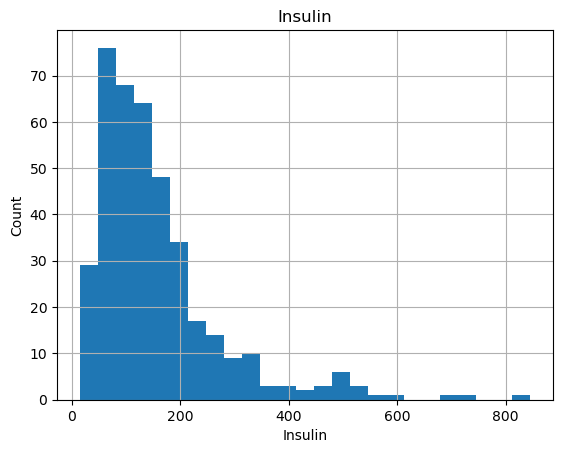

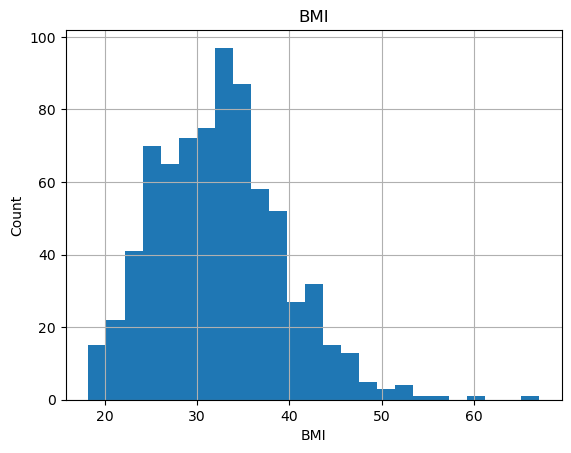

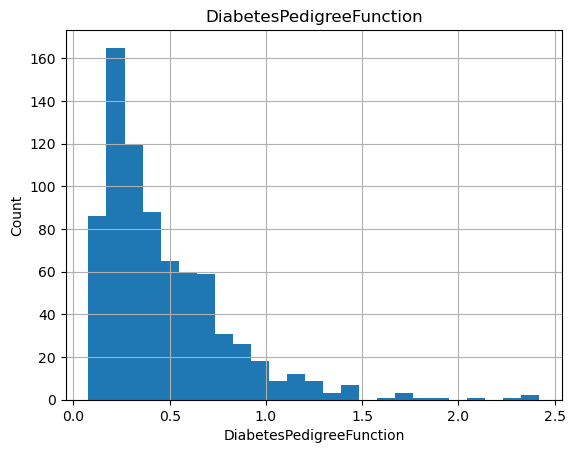

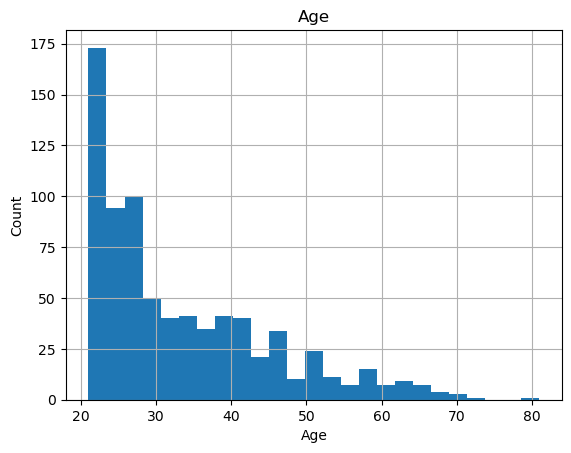

In [79]:
#Get all the columns having numerical values 
num_data = [features for features in df_copy.columns if df_copy[features].dtypes != 'O']
print(f'Number of numerical columns is {len(num_data)}')

df_copy[num_data].head()
# Check if any numerical columns are continous
continous_columns = [feature for feature in num_data if feature not in discrete_columns and feature not in ['Outcome'] ]
print(f'Number of Continous Columns is {len(continous_columns)}')

df_copy[continous_columns].head()
#Check distribution of the Continous data
for feature in continous_columns:
    dt = df_copy.copy()
    dt[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

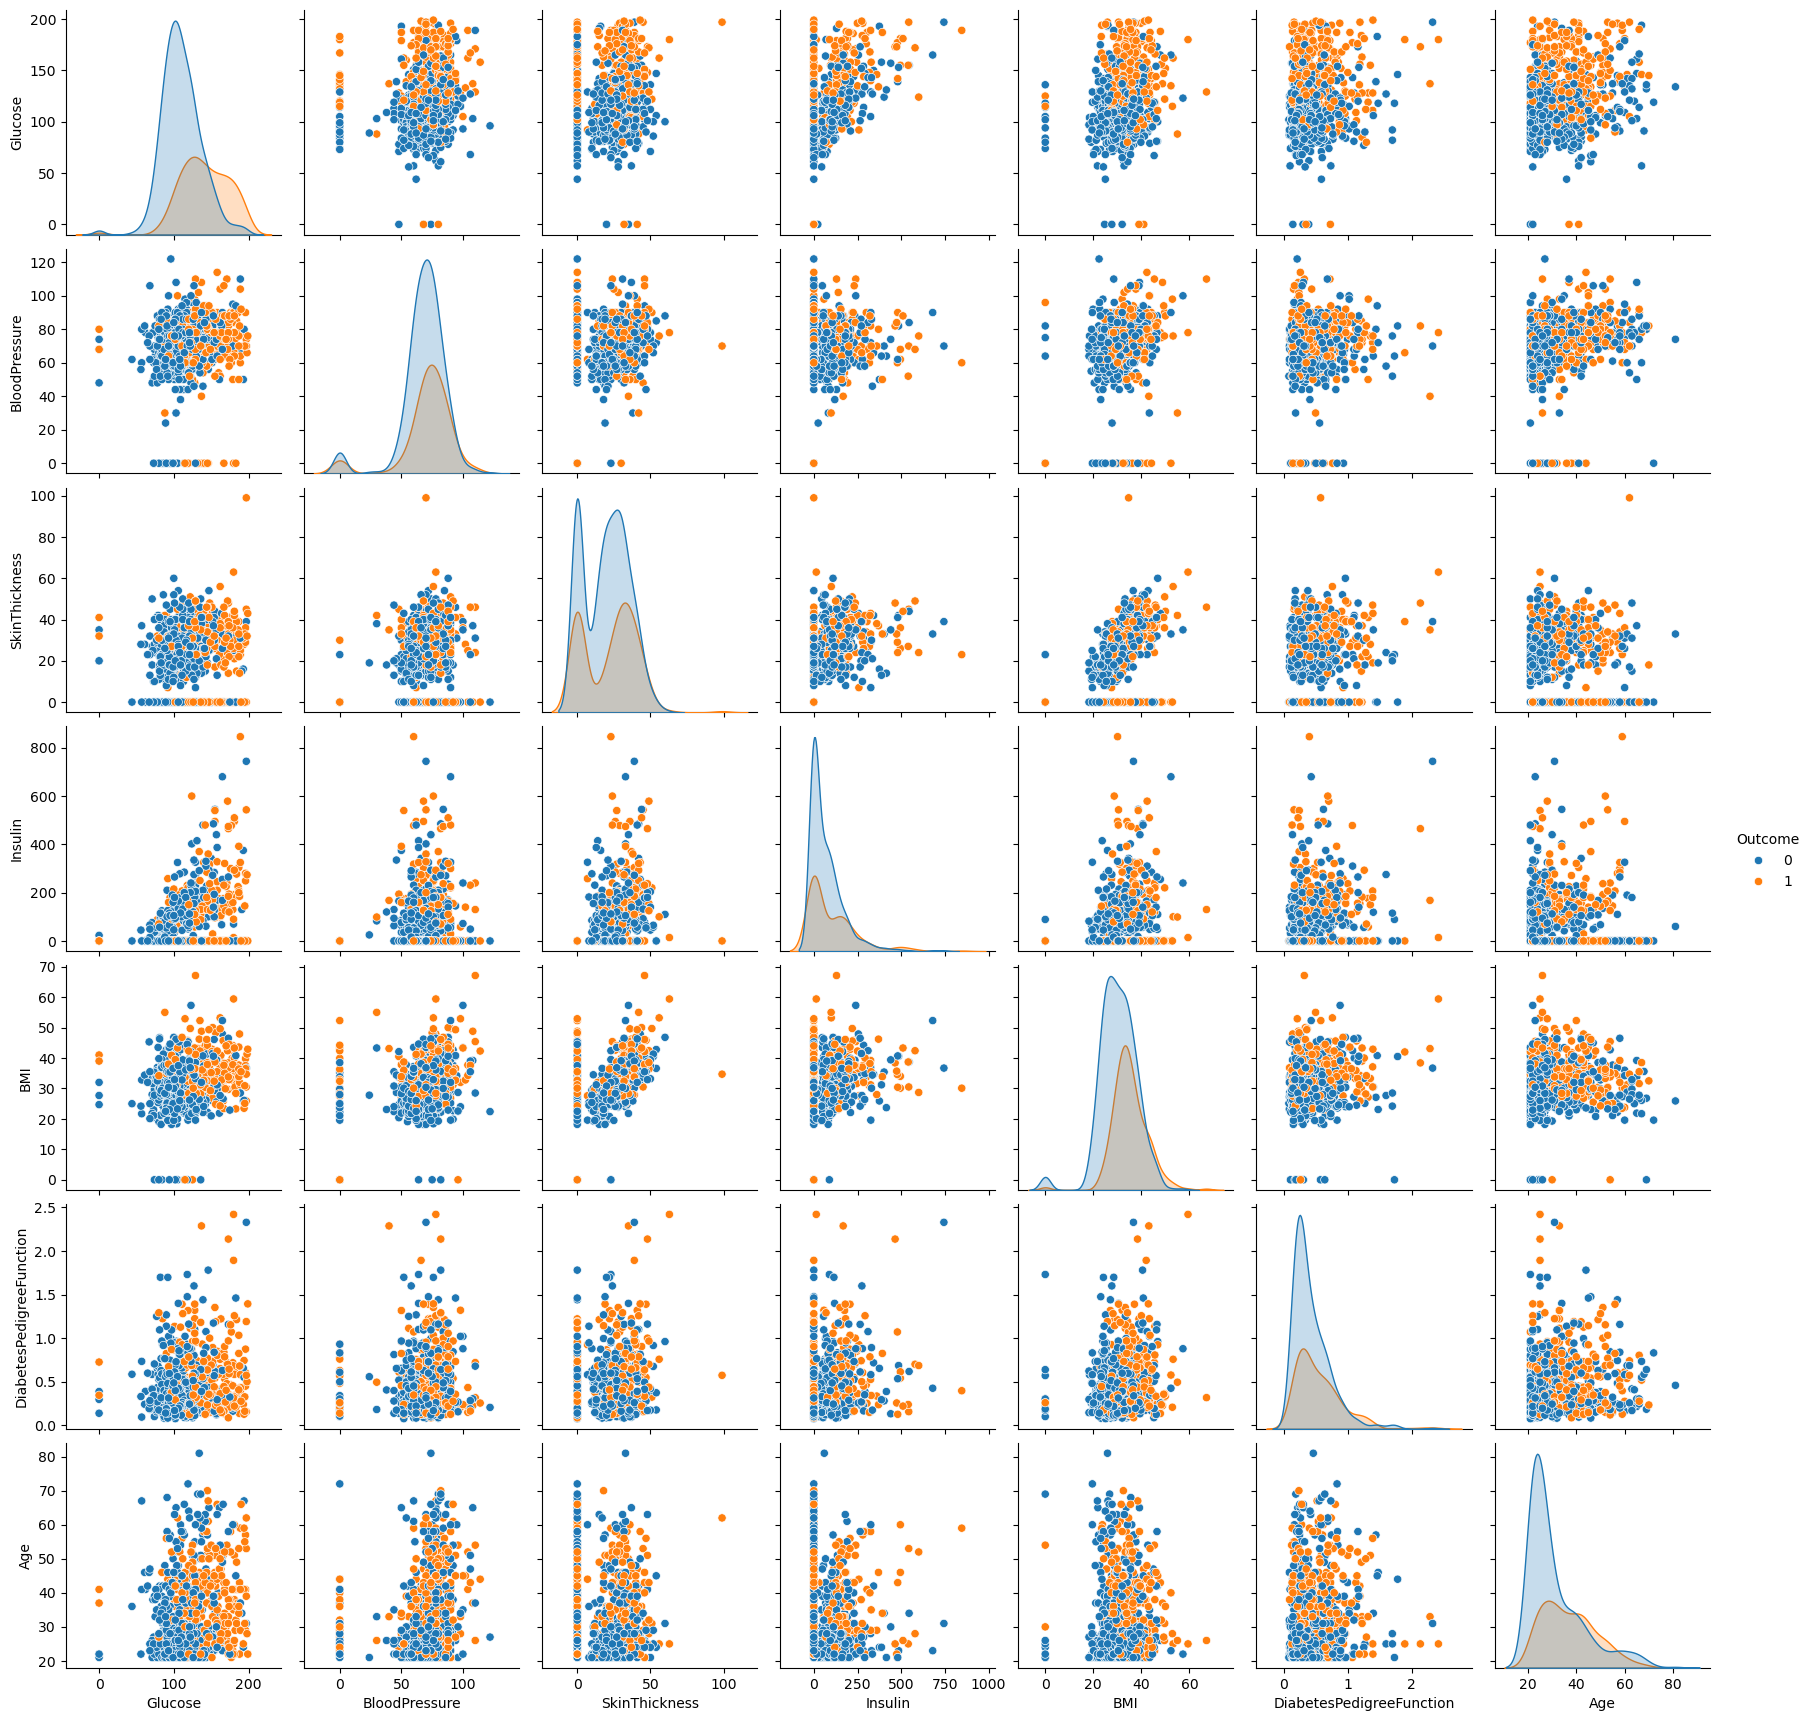

In [81]:
data = pd.read_csv("C:/Users/shubh/Downloads/diabetes.csv")
data['Outcome'] = data['Outcome'].apply(lambda x:1 if x==True else 0)
sns.pairplot(data, hue='Outcome',vars = data.columns[1:-1])

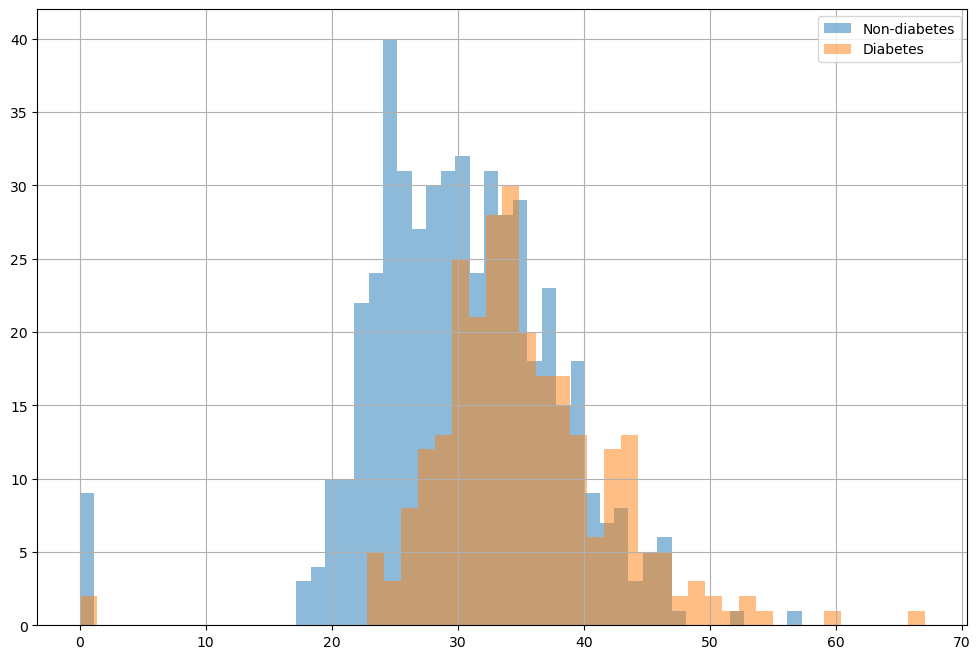

In [82]:
import matplotlib.pyplot as plt

data[data['Outcome'] == 0]['BMI'].hist(bins=50, figsize=(12, 8), alpha=0.5, label='Non-diabetes')
data[data['Outcome'] == 1]['BMI'].hist(bins=50, figsize=(12, 8), alpha=0.5, label='Diabetes')
plt.legend()
plt.show()